# Parte 1: Ruido Clásico

## Celda 1: Importación de Librerías

In [ ]:
# Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

# Configuración de matplotlib para mejores gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8')

print("Librerías importadas correctamente")

Librerías importadas correctamente


## Celda 2: Función Teórica de Reintentos

In [ ]:
def numero_medio_reintentos_teorico(BER, L, n):
    """
    Calcula el número medio teórico de reintentos de envío de un paquete.

    Parámetros:
    - BER: Bit Error Rate (probabilidad de error de bit)
    - L: Longitud del paquete en bits
    - n: Número de saltos hasta el destino

    Returns:
    - R: Número medio teórico de reintentos
    """
    # Probabilidad de error por bit en un salto
    p_error_bit_salto = BER

    # Probabilidad de que un bit sea correcto en un salto
    p_correcto_bit_salto = 1 - p_error_bit_salto

    # Probabilidad de que un paquete sea correcto en todos los n saltos
    p_paquete_correcto = (p_correcto_bit_salto ** L) ** n

    # Probabilidad de error del paquete
    p_error_paquete = 1 - p_paquete_correcto

    # Número medio de reintentos (distribución geométrica)
    # E[X] = p/(1-p) donde p es la probabilidad de éxito
    R = p_error_paquete / p_paquete_correcto

    return R




## Celda 3: Función de Simulación de Retransmisiones

In [ ]:
def simular_retransmisiones(BER, L, n, num_simulaciones=10000):
    """
    Simula las retransmisiones usando distribución geométrica.

    Parámetros:
    - BER: Bit Error Rate
    - L: Longitud del paquete en bits
    - n: Número de saltos
    - num_simulaciones: Número de simulaciones a realizar

    Returns:
    - media_reintentos: Número medio de reintentos simulado
    """

    # Calcular probabilidad de éxito del paquete
    p_correcto_bit_salto = 1 - BER
    p_paquete_correcto = (p_correcto_bit_salto ** L) ** n

    # Lista para almacenar el número de reintentos de cada simulación
    reintentos = []

    for _ in range(num_simulaciones):
        # Usar distribución geométrica para simular intentos hasta el éxito
        # geom.rvs(p) - 1 nos da el número de fallos antes del primer éxito
        num_reintentos = stats.geom.rvs(p_paquete_correcto) - 1
        reintentos.append(num_reintentos)

    # Calcular media
    media_reintentos = np.mean(reintentos)

    return media_reintentos


## Celda 4: Parámetros y Cálculos

In [ ]:
# Definir parámetros del experimento
BER_values = [1e-3, 1e-4, 1e-5, 1e-6]  # Diferentes valores de BER
n_values = np.arange(1, 17)  # n desde 1 a 16
L = 1000  # Longitud del paquete en bits (ajustar según necesidades)

# Diccionarios para almacenar resultados
resultados_teoricos = {}
resultados_simulados = {}

# Calcular para cada valor de BER
for BER in BER_values:
    print(f"Calculando para BER = {BER}")

    teoricos = []
    simulados = []

    for n in n_values:
        # Cálculo teórico
        teorico = numero_medio_reintentos_teorico(BER, L, n)
        teoricos.append(teorico)

        # Simulación
        simulado = simular_retransmisiones(BER, L, n, num_simulaciones=5000)
        simulados.append(simulado)

        print(f"  n={n:2d}: Teórico={teorico:.4f}, Simulado={simulado:.4f}")

    resultados_teoricos[BER] = teoricos
    resultados_simulados[BER] = simulados

print("\nCálculos completados.")


Calculando para BER = 0.001
  n= 1: Teórico=1.7196, Simulado=1.7610
  n= 2: Teórico=6.3965, Simulado=6.4652
  n= 3: Teórico=19.1157, Simulado=19.3038
  n= 4: Teórico=53.7075, Simulado=53.0714
  n= 5: Teórico=147.7849, Simulado=146.2824
  n= 6: Teórico=403.6417, Simulado=402.5530
  n= 7: Teórico=1099.4807, Simulado=1091.9956
  n= 8: Teórico=2991.9137, Simulado=3020.9084
  n= 9: Teórico=8138.6544, Simulado=8140.4904
  n=10: Teórico=22135.9478, Simulado=22299.0606
  n=11: Teórico=60203.5777, Simulado=59804.8094
  n=12: Teórico=163733.9111, Simulado=163027.2528
  n=13: Teórico=445299.3764, Simulado=445325.6530
  n=14: Teórico=1211056.7027, Simulado=1185816.0810
  n=15: Teórico=3293642.6547, Simulado=3286130.1976
  n=16: Teórico=8957531.3292, Simulado=8990480.5372
Calculando para BER = 0.0001
  n= 1: Teórico=0.1052, Simulado=0.1058
  n= 2: Teórico=0.2214, Simulado=0.2218
  n= 3: Teórico=0.3499, Simulado=0.3444
  n= 4: Teórico=0.4919, Simulado=0.5056
  n= 5: Teórico=0.6488, Simulado=0.6378
 

## Celda 5: Visualización y Comparación

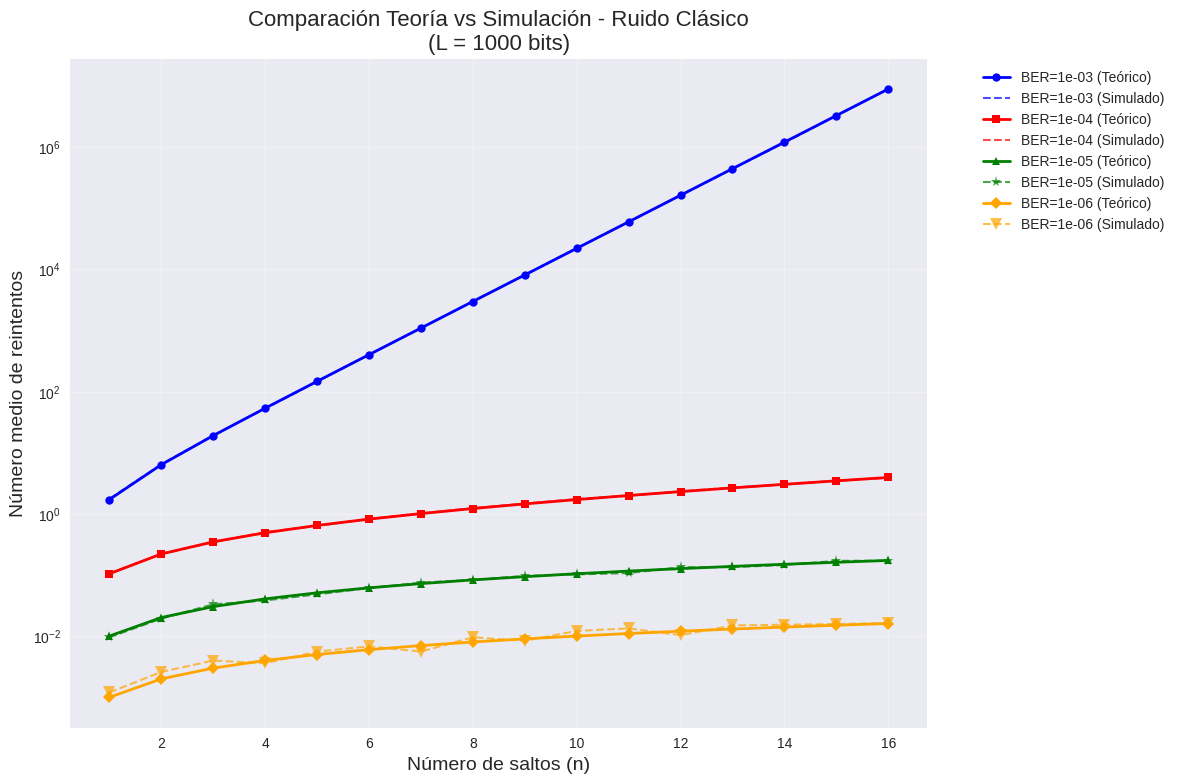

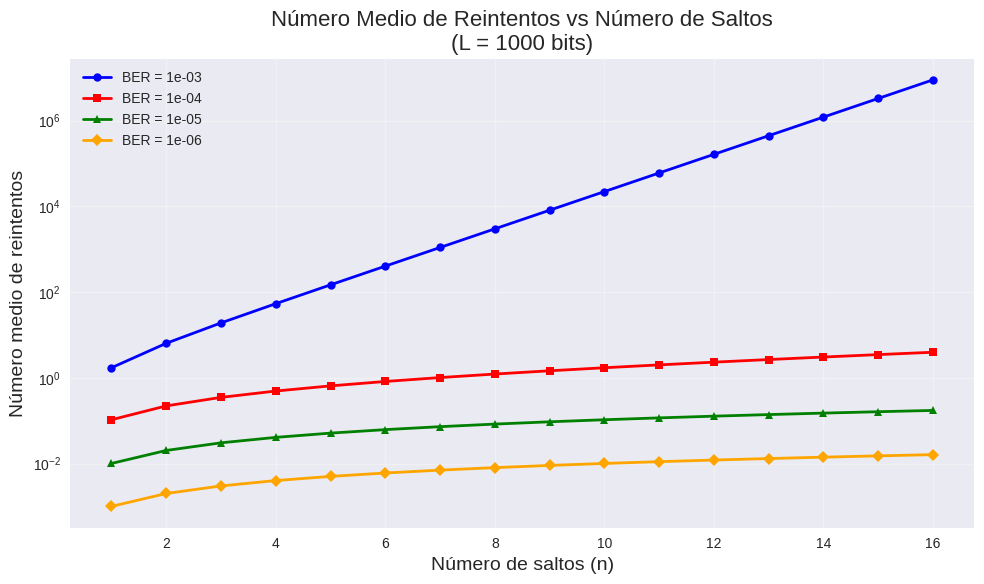

In [ ]:
# Crear gráfica comparativa
plt.figure(figsize=(12, 8))

# Colores para cada BER
colores = ['blue', 'red', 'green', 'orange']
markers_teorico = ['o', 's', '^', 'D']
markers_simulado = ['x', '+', '*', 'v']

# Plotear para cada valor de BER
for i, BER in enumerate(BER_values):
    # Línea teórica
    plt.plot(n_values, resultados_teoricos[BER],
             color=colores[i], marker=markers_teorico[i],
             linestyle='-', linewidth=2, markersize=6,
             label=f'BER={BER:.0e} (Teórico)')

    # Puntos simulados
    plt.plot(n_values, resultados_simulados[BER],
             color=colores[i], marker=markers_simulado[i],
             linestyle='--', linewidth=1.5, markersize=8, alpha=0.7,
             label=f'BER={BER:.0e} (Simulado)')

# Configuración del gráfico
plt.xlabel('Número de saltos (n)', fontsize=14)
plt.ylabel('Número medio de reintentos', fontsize=14)
plt.title(f'Comparación Teoría vs Simulación - Ruido Clásico\n(L = {L} bits)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Crear segunda gráfica solo con líneas teóricas para mejor visualización
plt.figure(figsize=(10, 6))

for i, BER in enumerate(BER_values):
    plt.plot(n_values, resultados_teoricos[BER],
             color=colores[i], marker=markers_teorico[i],
             linestyle='-', linewidth=2, markersize=6,
             label=f'BER = {BER:.0e}')

plt.xlabel('Número de saltos (n)', fontsize=14)
plt.ylabel('Número medio de reintentos', fontsize=14)
plt.title(f'Número Medio de Reintentos vs Número de Saltos\n(L = {L} bits)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


## Celda 6: Análisis de Resultados

In [ ]:
# Análisis cuantitativo de los resultados
print("=== ANÁLISIS DE RESULTADOS - RUIDO CLÁSICO ===\n")

print(f"Parámetros utilizados:")
print(f"- Longitud de paquete (L): {L} bits")
print(f"- Valores de BER: {BER_values}")
print(f"- Rango de saltos (n): {n_values[0]} a {n_values[-1]}")
print(f"- Simulaciones por punto: 5000\n")

# Calcular errores relativos entre teoría y simulación
print("Errores relativos promedio (Simulación vs Teoría):")
for BER in BER_values:
    errores_rel = []
    for i in range(len(n_values)):
        teorico = resultados_teoricos[BER][i]
        simulado = resultados_simulados[BER][i]
        if teorico > 0:
            error_rel = abs((simulado - teorico) / teorico) * 100
            errores_rel.append(error_rel)

    error_promedio = np.mean(errores_rel)
    print(f"  BER = {BER:.0e}: {error_promedio:.2f}%")

# Mostrar algunos valores específicos
print(f"\nComparación para n = 10:")
for BER in BER_values:
    idx = 9  # n=10 está en índice 9
    teorico = resultados_teoricos[BER][idx]
    simulado = resultados_simulados[BER][idx]
    print(f"  BER = {BER:.0e}: Teórico = {teorico:.4f}, Simulado = {simulado:.4f}")


=== ANÁLISIS DE RESULTADOS - RUIDO CLÁSICO ===

Parámetros utilizados:
- Longitud de paquete (L): 1000 bits
- Valores de BER: [0.001, 0.0001, 1e-05, 1e-06]
- Rango de saltos (n): 1 a 16
- Simulaciones por punto: 5000

Errores relativos promedio (Simulación vs Teoría):
  BER = 1e-03: 0.82%
  BER = 1e-04: 1.13%
  BER = 1e-05: 3.96%
  BER = 1e-06: 15.70%

Comparación para n = 10:
  BER = 1e-03: Teórico = 22135.9478, Simulado = 22299.0606
  BER = 1e-04: Teórico = 1.7184, Simulado = 1.7514
  BER = 1e-05: Teórico = 0.1052, Simulado = 0.1026
  BER = 1e-06: Teórico = 0.0101, Simulado = 0.0122


# Parte 2: Ruido Cuántico

## Celda 7: Importación de Librerías Cuánticas

In [ ]:
# Importación de librerías para computación cuántica
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_I = np.array([[1, 0], [0, 1]], dtype=complex)

# Vectores de Pauli
pauli_matrices = [sigma_x, sigma_y, sigma_z]

print("Librerías cuánticas importadas correctamente")
print("Matrices de Pauli definidas:")
print(f"σₓ =\n{sigma_x}")
print(f"σᵧ =\n{sigma_y}")
print(f"σᵢ =\n{sigma_z}")


Librerías cuánticas importadas correctamente
Matrices de Pauli definidas:
σₓ =
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
σᵧ =
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
σᵢ =
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


## Celda 8: Demostración Teórica - Matriz de Densidad como Vector de Bloch

In [ ]:
def matriz_densidad_a_bloch(rho):
    """
    Convierte una matriz de densidad a su representación de vector de Bloch.

    Una matriz de densidad ρ se puede escribir como:
    ρ = (1/2)(I + r⃗·σ⃗)

    donde r⃗ = (rx, ry, rz) es el vector de Bloch y σ⃗ = (σₓ, σᵧ, σᵢ)

    Parámetros:
    - rho: matriz de densidad 2x2

    Returns:
    - r_vector: vector de Bloch [rx, ry, rz]
    """

    # Calcular componentes del vector de Bloch usando Tr(ρ σᵢ)
    rx = np.real(np.trace(rho @ sigma_x))
    ry = np.real(np.trace(rho @ sigma_y))
    rz = np.real(np.trace(rho @ sigma_z))

    r_vector = np.array([rx, ry, rz])

    return r_vector

def bloch_a_matriz_densidad(r_vector):
    """
    Convierte un vector de Bloch a su matriz de densidad correspondiente.

    ρ = (1/2)(I + r⃗·σ⃗) = (1/2)(I + rx*σₓ + ry*σᵧ + rz*σᵢ)

    Parámetros:
    - r_vector: vector de Bloch [rx, ry, rz]

    Returns:
    - rho: matriz de densidad 2x2
    """
    rx, ry, rz = r_vector

    rho = 0.5 * (sigma_I + rx*sigma_x + ry*sigma_y + rz*sigma_z)

    return rho

# Demostración con ejemplos
print("=== DEMOSTRACIÓN: MATRIZ DE DENSIDAD ↔ VECTOR DE BLOCH ===\n")

# Ejemplo 1: Estado puro |0⟩
estado_0 = np.array([[1, 0], [0, 0]], dtype=complex)
r_0 = matriz_densidad_a_bloch(estado_0)
print("Estado |0⟩:")
print(f"Matriz de densidad:\n{estado_0}")
print(f"Vector de Bloch: {r_0}")
print(f"Norma: {np.linalg.norm(r_0):.6f}")

# Ejemplo 2: Estado puro |1⟩
estado_1 = np.array([[0, 0], [0, 1]], dtype=complex)
r_1 = matriz_densidad_a_bloch(estado_1)
print(f"\nEstado |1⟩:")
print(f"Matriz de densidad:\n{estado_1}")
print(f"Vector de Bloch: {r_1}")
print(f"Norma: {np.linalg.norm(r_1):.6f}")

# Ejemplo 3: Estado mezclado (máximamente mezclado)
estado_mezclado = 0.5 * (estado_0 + estado_1)
r_mezclado = matriz_densidad_a_bloch(estado_mezclado)
print(f"\nEstado máximamente mezclado:")
print(f"Matriz de densidad:\n{estado_mezclado}")
print(f"Vector de Bloch: {r_mezclado}")
print(f"Norma: {np.linalg.norm(r_mezclado):.6f}")

# Verificación de la transformación inversa
print(f"\n=== VERIFICACIÓN DE TRANSFORMACIÓN INVERSA ===")
rho_reconstruida = bloch_a_matriz_densidad(r_0)
print(f"Matriz original |0⟩:\n{estado_0}")
print(f"Matriz reconstruida:\n{rho_reconstruida}")
print(f"Diferencia: {np.max(np.abs(estado_0 - rho_reconstruida)):.2e}")


=== DEMOSTRACIÓN: MATRIZ DE DENSIDAD ↔ VECTOR DE BLOCH ===

Estado |0⟩:
Matriz de densidad:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Vector de Bloch: [0. 0. 1.]
Norma: 1.000000

Estado |1⟩:
Matriz de densidad:
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Vector de Bloch: [ 0.  0. -1.]
Norma: 1.000000

Estado máximamente mezclado:
Matriz de densidad:
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Vector de Bloch: [0. 0. 0.]
Norma: 0.000000

=== VERIFICACIÓN DE TRANSFORMACIÓN INVERSA ===
Matriz original |0⟩:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Matriz reconstruida:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Diferencia: 0.00e+00


## Celda 9: Función de Visualización de Vector de Bloch en 3D

Visualización de diferentes estados cuánticos:


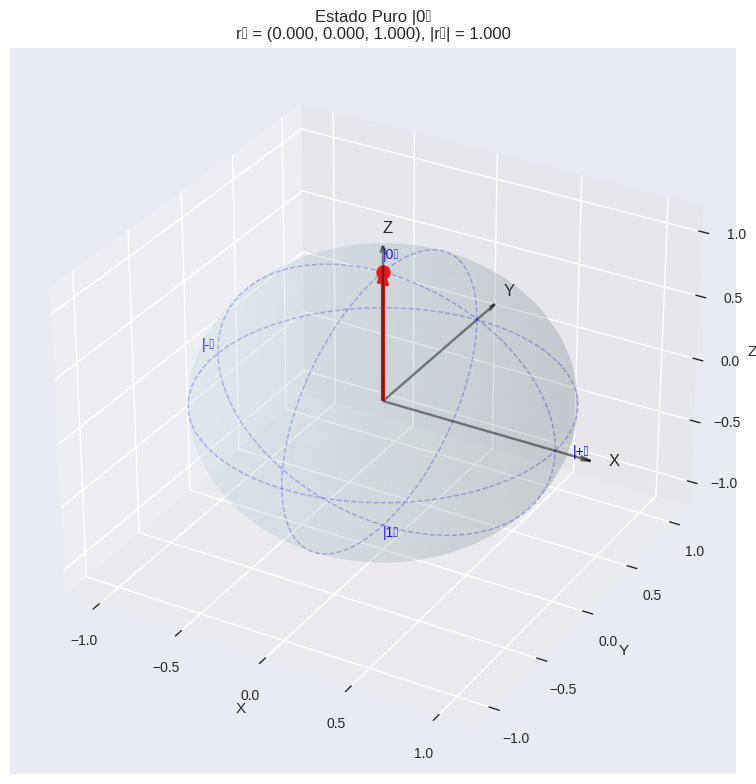

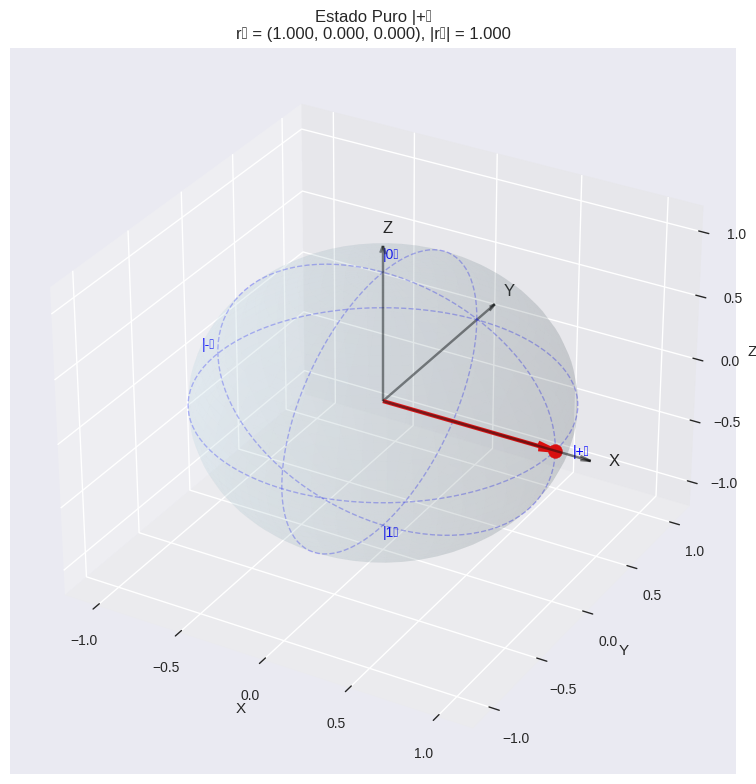

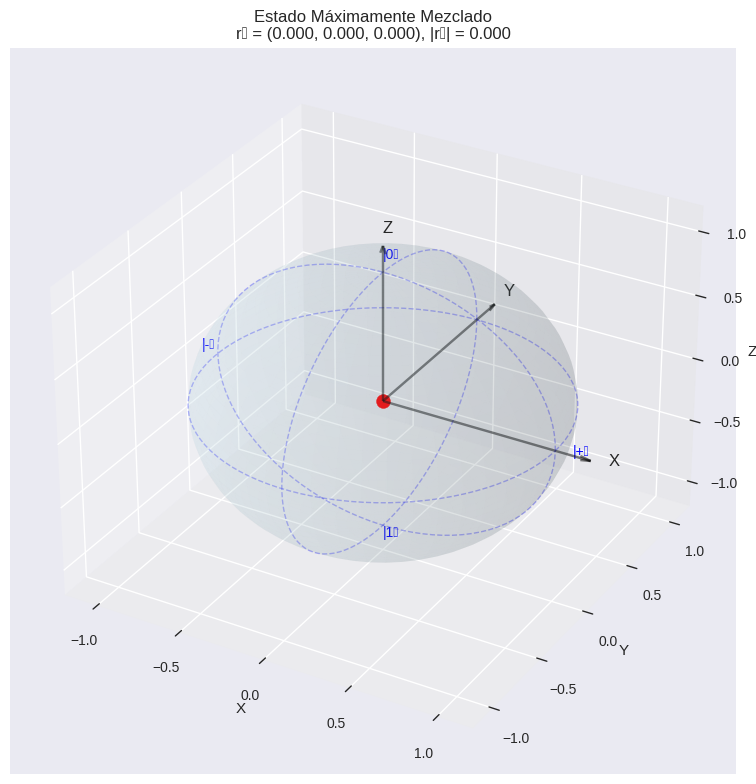

In [ ]:
def visualizar_vector_bloch(rho, titulo="Vector de Bloch", mostrar_esfera=True):
    """
    Visualiza el vector de Bloch correspondiente a una matriz de densidad.

    Parámetros:
    - rho: matriz de densidad 2x2
    - titulo: título del gráfico
    - mostrar_esfera: si mostrar la esfera de Bloch de referencia
    """

    # Obtener vector de Bloch
    r_vector = matriz_densidad_a_bloch(rho)
    rx, ry, rz = r_vector

    # Crear figura 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    if mostrar_esfera:
        # Dibujar esfera de Bloch (estados puros)
        u = np.linspace(0, 2 * np.pi, 50)
        v = np.linspace(0, np.pi, 50)
        x_esfera = np.outer(np.cos(u), np.sin(v))
        y_esfera = np.outer(np.sin(u), np.sin(v))
        z_esfera = np.outer(np.ones(np.size(u)), np.cos(v))

        ax.plot_surface(x_esfera, y_esfera, z_esfera,
                       alpha=0.1, color='lightblue', linewidth=0)

        # Círculos de referencia
        theta = np.linspace(0, 2*np.pi, 100)

        # Ecuador (z=0)
        x_eq = np.cos(theta)
        y_eq = np.sin(theta)
        z_eq = np.zeros_like(theta)
        ax.plot(x_eq, y_eq, z_eq, 'b--', alpha=0.3, linewidth=1)

        # Meridiano x=0
        y_mer = np.cos(theta)
        z_mer = np.sin(theta)
        x_mer = np.zeros_like(theta)
        ax.plot(x_mer, y_mer, z_mer, 'b--', alpha=0.3, linewidth=1)

        # Meridiano y=0
        x_mer2 = np.cos(theta)
        z_mer2 = np.sin(theta)
        y_mer2 = np.zeros_like(theta)
        ax.plot(x_mer2, y_mer2, z_mer2, 'b--', alpha=0.3, linewidth=1)

    # Dibujar vector de Bloch
    ax.quiver(0, 0, 0, rx, ry, rz,
             color='red', arrow_length_ratio=0.1, linewidth=3)

    # Punto en el extremo del vector
    ax.scatter([rx], [ry], [rz], color='red', s=100)

    # Ejes coordenados
    ax.quiver(0, 0, 0, 1.2, 0, 0, color='black', alpha=0.5, arrow_length_ratio=0.05)
    ax.quiver(0, 0, 0, 0, 1.2, 0, color='black', alpha=0.5, arrow_length_ratio=0.05)
    ax.quiver(0, 0, 0, 0, 0, 1.2, color='black', alpha=0.5, arrow_length_ratio=0.05)

    # Etiquetas de ejes
    ax.text(1.3, 0, 0, 'X', fontsize=12)
    ax.text(0, 1.3, 0, 'Y', fontsize=12)
    ax.text(0, 0, 1.3, 'Z', fontsize=12)

    # Etiquetas de estados
    ax.text(0, 0, 1.1, '|0⟩', fontsize=10, color='blue')
    ax.text(0, 0, -1.1, '|1⟩', fontsize=10, color='blue')
    ax.text(1.1, 0, 0, '|+⟩', fontsize=10, color='blue')
    ax.text(-1.1, 0, 0, '|-⟩', fontsize=10, color='blue')

    # Configuración
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(titulo + f'\nr⃗ = ({rx:.3f}, {ry:.3f}, {rz:.3f}), |r⃗| = {np.linalg.norm(r_vector):.3f}')

    plt.tight_layout()
    plt.show()

# Ejemplos de visualización
print("Visualización de diferentes estados cuánticos:")

# Estado |0⟩
visualizar_vector_bloch(estado_0, "Estado Puro |0⟩")

# Estado |+⟩ = (|0⟩ + |1⟩)/√2
estado_plus = np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex)
visualizar_vector_bloch(estado_plus, "Estado Puro |+⟩")

# Estado mezclado
visualizar_vector_bloch(estado_mezclado, "Estado Máximamente Mezclado")


## Celda 10: Modelos de Ruido Cuántico

In [ ]:
def canal_bit_flip(rho, p):
    """
    Aplica el canal Bit Flip con probabilidad p.

    E₀ = √(1-p) I, E₁ = √p σₓ
    ρ_out = (1-p)ρ + p σₓ ρ σₓ

    Parámetros:
    - rho: matriz de densidad de entrada
    - p: probabilidad de bit flip (0 ≤ p ≤ 1)

    Returns:
    - rho_out: matriz de densidad después del ruido
    """
    rho_out = (1-p) * rho + p * (sigma_x @ rho @ sigma_x)
    return rho_out

def canal_phase_flip(rho, p):
    """
    Aplica el canal Phase Flip con probabilidad p.

    E₀ = √(1-p) I, E₁ = √p σᵢ
    ρ_out = (1-p)ρ + p σᵢ ρ σᵢ

    Parámetros:
    - rho: matriz de densidad de entrada
    - p: probabilidad de phase flip (0 ≤ p ≤ 1)

    Returns:
    - rho_out: matriz de densidad después del ruido
    """
    rho_out = (1-p) * rho + p * (sigma_z @ rho @ sigma_z)
    return rho_out

def canal_depolarizing(rho, p):
    """
    Aplica el canal Depolarizing con probabilidad p.

    ρ_out = (1-p)ρ + (p/3)(σₓ ρ σₓ + σᵧ ρ σᵧ + σᵢ ρ σᵢ)

    Parámetros:
    - rho: matriz de densidad de entrada
    - p: probabilidad de despolarización (0 ≤ p ≤ 1)

    Returns:
    - rho_out: matriz de densidad después del ruido
    """
    # Aplicar cada matriz de Pauli con probabilidad p/3
    pauli_term = (sigma_x @ rho @ sigma_x +
                  sigma_y @ rho @ sigma_y +
                  sigma_z @ rho @ sigma_z) / 3

    rho_out = (1-p) * rho + p * pauli_term
    return rho_out

# Función para generar estados puros en la esfera de Bloch
def generar_estados_esfera(n_puntos=100):
    """
    Genera n_puntos estados puros uniformemente distribuidos en la esfera de Bloch.

    Returns:
    - estados: lista de matrices de densidad correspondientes a estados puros
    - vectores_bloch: lista de vectores de Bloch correspondientes
    """
    estados = []
    vectores_bloch = []

    # Generar puntos uniformemente en la esfera
    phi = np.random.uniform(0, 2*np.pi, n_puntos)  # Ángulo azimutal
    costheta = np.random.uniform(-1, 1, n_puntos)  # cos(θ) polar
    theta = np.arccos(costheta)

    for i in range(n_puntos):
        # Coordenadas cartesianas del vector de Bloch
        rx = np.sin(theta[i]) * np.cos(phi[i])
        ry = np.sin(theta[i]) * np.sin(phi[i])
        rz = np.cos(theta[i])

        r_vector = np.array([rx, ry, rz])
        vectores_bloch.append(r_vector)

        # Convertir a matriz de densidad
        rho = bloch_a_matriz_densidad(r_vector)
        estados.append(rho)

    return estados, vectores_bloch

# Ejemplo de uso de los canales de ruido
print("=== CANALES DE RUIDO CUÁNTICO ===\n")

# Estado inicial |0⟩
rho_inicial = estado_0
print("Estado inicial |0⟩:")
print(f"Vector de Bloch: {matriz_densidad_a_bloch(rho_inicial)}")

p = 0.3  # Probabilidad de ruido

# Aplicar diferentes canales
rho_bf = canal_bit_flip(rho_inicial, p)
rho_pf = canal_phase_flip(rho_inicial, p)
rho_dep = canal_depolarizing(rho_inicial, p)

print(f"\nDespués de aplicar ruido con p = {p}:")
print(f"Bit Flip: {matriz_densidad_a_bloch(rho_bf)}")
print(f"Phase Flip: {matriz_densidad_a_bloch(rho_pf)}")
print(f"Depolarizing: {matriz_densidad_a_bloch(rho_dep)}")


=== CANALES DE RUIDO CUÁNTICO ===

Estado inicial |0⟩:
Vector de Bloch: [0. 0. 1.]

Después de aplicar ruido con p = 0.3:
Bit Flip: [0.  0.  0.4]
Phase Flip: [0. 0. 1.]
Depolarizing: [0.  0.  0.6]


## Celda 11: Visualización de Deformaciones de la Esfera de Bloch

Generando visualizaciones de deformaciones...

1. Canal Bit Flip


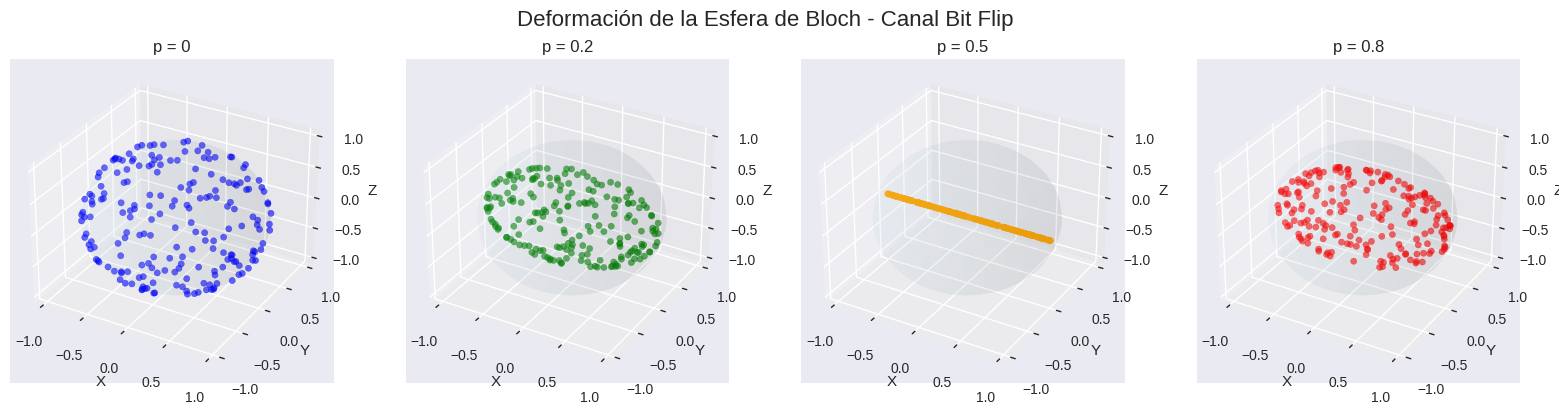

2. Canal Phase Flip


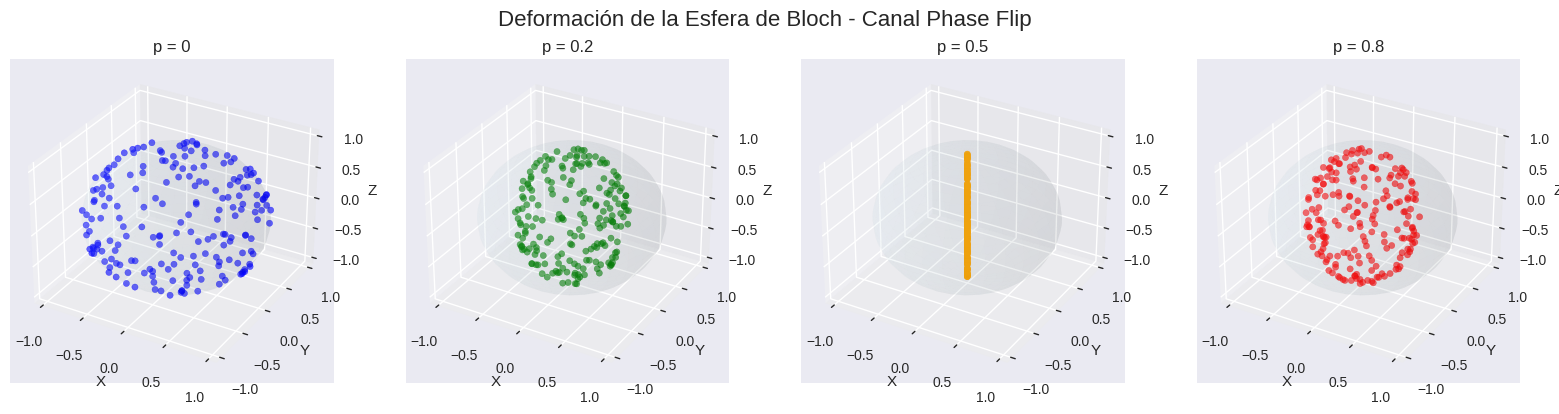

3. Canal Depolarizing


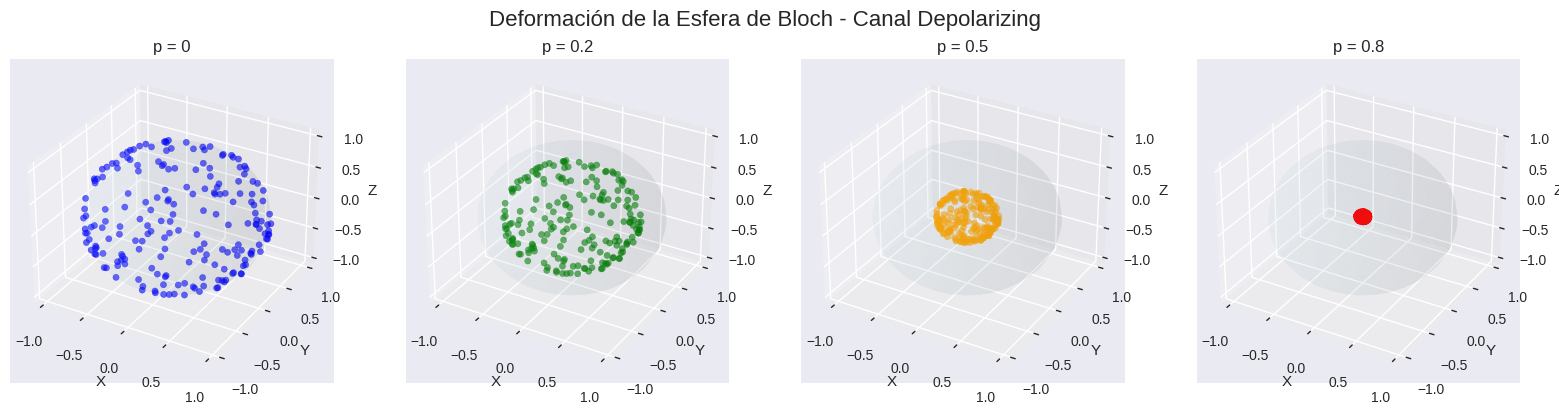

In [ ]:
def visualizar_deformacion_esfera(canal_func, nombre_canal, p_values=[0, 0.2, 0.5, 0.8], n_puntos=200):
    """
    Visualiza la deformación de la esfera de Bloch para diferentes valores de p.

    Parámetros:
    - canal_func: función del canal de ruido
    - nombre_canal: nombre del canal para el título
    - p_values: lista de valores de probabilidad p
    - n_puntos: número de puntos para generar en la esfera
    """

    # Generar estados puros uniformemente distribuidos
    estados, vectores_originales = generar_estados_esfera(n_puntos)

    # Crear figura con subplots
    fig = plt.figure(figsize=(16, 4))

    colores = ['blue', 'green', 'orange', 'red']

    for i, p in enumerate(p_values):
        ax = fig.add_subplot(1, len(p_values), i+1, projection='3d')

        # Aplicar canal de ruido a todos los estados
        vectores_transformados = []
        for estado in estados:
            estado_ruidoso = canal_func(estado, p)
            vector_ruidoso = matriz_densidad_a_bloch(estado_ruidoso)
            vectores_transformados.append(vector_ruidoso)

        vectores_transformados = np.array(vectores_transformados)

        # Dibujar esfera original (transparente)
        u = np.linspace(0, 2 * np.pi, 30)
        v = np.linspace(0, np.pi, 30)
        x_esfera = np.outer(np.cos(u), np.sin(v))
        y_esfera = np.outer(np.sin(u), np.sin(v))
        z_esfera = np.outer(np.ones(np.size(u)), np.cos(v))

        ax.plot_surface(x_esfera, y_esfera, z_esfera,
                       alpha=0.05, color='lightblue', linewidth=0)

        # Dibujar puntos transformados
        ax.scatter(vectores_transformados[:, 0],
                  vectores_transformados[:, 1],
                  vectores_transformados[:, 2],
                  c=colores[i], alpha=0.6, s=20)

        # Configuración del subplot
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.set_zlim([-1.1, 1.1])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'p = {p}')

        # Hacer los ejes más claros
        ax.grid(True, alpha=0.3)

    plt.suptitle(f'Deformación de la Esfera de Bloch - Canal {nombre_canal}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualizar deformaciones para cada tipo de canal
print("Generando visualizaciones de deformaciones...\n")

# Canal Bit Flip
print("1. Canal Bit Flip")
visualizar_deformacion_esfera(canal_bit_flip, "Bit Flip")

# Canal Phase Flip
print("2. Canal Phase Flip")
visualizar_deformacion_esfera(canal_phase_flip, "Phase Flip")

# Canal Depolarizing
print("3. Canal Depolarizing")
visualizar_deformacion_esfera(canal_depolarizing, "Depolarizing")


## Celda 12: Análisis Detallado de las Deformaciones

In [ ]:
def analizar_deformacion_cuantitativa(canal_func, nombre_canal, p_values=np.linspace(0, 1, 11)):
    """
    Análisis cuantitativo de cómo cada canal deforma la esfera de Bloch.

    Parámetros:
    - canal_func: función del canal de ruido
    - nombre_canal: nombre del canal
    - p_values: valores de p a analizar
    """

    print(f"=== ANÁLISIS CUANTITATIVO: CANAL {nombre_canal.upper()} ===\n")

    # Estados de prueba específicos
    estados_test = {
        "|0⟩": np.array([[1, 0], [0, 0]], dtype=complex),
        "|1⟩": np.array([[0, 0], [0, 1]], dtype=complex),
        "|+⟩": np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex),
        "|-⟩": np.array([[0.5, -0.5], [-0.5, 0.5]], dtype=complex),
        "|i+⟩": np.array([[0.5, -0.5j], [0.5j, 0.5]], dtype=complex),
        "|i-⟩": np.array([[0.5, 0.5j], [-0.5j, 0.5]], dtype=complex)
    }

    # Analizar evolución de estados específicos
    print("Evolución de estados específicos:")
    print("p\t|0⟩\t\t|1⟩\t\t|+⟩\t\t|-⟩")
    print("-" * 80)

    for p in [0, 0.25, 0.5, 0.75, 1.0]:
        linea = f"{p:.2f}\t"
        for nombre_estado in ["|0⟩", "|1⟩", "|+⟩", "|-⟩"]:
            estado = estados_test[nombre_estado]
            estado_ruidoso = canal_func(estado, p)
            r_vector = matriz_densidad_a_bloch(estado_ruidoso)
            norma = np.linalg.norm(r_vector)
            linea += f"{norma:.3f}\t\t"
        print(linea)

    # Analizar contracción general de la esfera
    print(f"\nContracción promedio de la esfera:")
    print("p\tNorma promedio\tDesviación std")
    print("-" * 40)

    for p in p_values[::2]:  # Cada dos valores para no saturar
        # Generar estados aleatorios
        estados_random, _ = generar_estados_esfera(100)
        normas = []

        for estado in estados_random:
            estado_ruidoso = canal_func(estado, p)
            r_vector = matriz_densidad_a_bloch(estado_ruidoso)
            norma = np.linalg.norm(r_vector)
            normas.append(norma)

        norma_promedio = np.mean(normas)
        desviacion = np.std(normas)
        print(f"{p:.2f}\t{norma_promedio:.4f}\t\t{desviacion:.4f}")

# Función para comparar todos los canales
def comparar_canales():
    """
    Compara el efecto de los tres canales de ruido sobre el estado |+⟩.
    """
    print("\n=== COMPARACIÓN ENTRE CANALES ===\n")

    # Estado de prueba |+⟩
    estado_plus = np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex)
    print("Estado inicial |+⟩:")
    print(f"Vector de Bloch: {matriz_densidad_a_bloch(estado_plus)}")

    p_values = [0.2, 0.5, 0.8]
    canales = [
        (canal_bit_flip, "Bit Flip"),
        (canal_phase_flip, "Phase Flip"),
        (canal_depolarizing, "Depolarizing")
    ]

    print(f"\nEfecto sobre |+⟩ para diferentes valores de p:")
    print("Canal\t\tp=0.2\t\tp=0.5\t\tp=0.8")
    print("-" * 60)

    for canal_func, nombre in canales:
        linea = f"{nombre}\t"
        for p in p_values:
            estado_ruidoso = canal_func(estado_plus, p)
            r_vector = matriz_densidad_a_bloch(estado_ruidoso)
            norma = np.linalg.norm(r_vector)
            linea += f"{norma:.3f}\t\t"
        print(linea)

# Ejecutar análisis
analizar_deformacion_cuantitativa(canal_bit_flip, "Bit Flip")
analizar_deformacion_cuantitativa(canal_phase_flip, "Phase Flip")
analizar_deformacion_cuantitativa(canal_depolarizing, "Depolarizing")

comparar_canales()

print("\n=== INTERPRETACIÓN FÍSICA ===")
print("• Bit Flip: Intercambia |0⟩ ↔ |1⟩, afecta principalmente el eje Z")
print("• Phase Flip: Cambia fase relativa, afecta principalmente los ejes X e Y")
print("• Depolarizing: Mezcla uniforme hacia el estado máximamente mezclado")
print("• Todos los canales contraen la esfera hacia el centro conforme p aumenta")
print("• Para p = 1: Bit/Phase flip llevan a estados específicos, Depolarizing al centro")


=== ANÁLISIS CUANTITATIVO: CANAL BIT FLIP ===

Evolución de estados específicos:
p	|0⟩		|1⟩		|+⟩		|-⟩
--------------------------------------------------------------------------------
0.00	1.000		1.000		1.000		1.000		
0.25	0.500		0.500		1.000		1.000		
0.50	0.000		0.000		1.000		1.000		
0.75	0.500		0.500		1.000		1.000		
1.00	1.000		1.000		1.000		1.000		

Contracción promedio de la esfera:
p	Norma promedio	Desviación std
----------------------------------------
0.00	1.0000		0.0000
0.20	0.7328		0.1182
0.40	0.5624		0.2487
0.60	0.5784		0.2486
0.80	0.7412		0.1197
1.00	1.0000		0.0000
=== ANÁLISIS CUANTITATIVO: CANAL PHASE FLIP ===

Evolución de estados específicos:
p	|0⟩		|1⟩		|+⟩		|-⟩
--------------------------------------------------------------------------------
0.00	1.000		1.000		1.000		1.000		
0.25	1.000		1.000		0.500		0.500		
0.50	1.000		1.000		0.000		0.000		
0.75	1.000		1.000		0.500		0.500		
1.00	1.000		1.000		1.000		1.000		

Contracción promedio de la esfera:
p	Norma promedio	Desviación

## Celda 13: Comentarios y Conclusiones Finales

In [ ]:
print("=== CONCLUSIONES - RUIDO CUÁNTICO ===\n")

print("1. REPRESENTACIÓN DE ESTADOS MEZCLADOS:")
print("   • Estados puros: |r⃗| = 1 (superficie de la esfera)")
print("   • Estados mezclados: |r⃗| < 1 (interior de la esfera)")
print("   • Estado máximamente mezclado: r⃗ = 0 (centro)")

print("\n2. EFECTOS DE LOS CANALES DE RUIDO:")

print("\n   a) Canal Bit Flip (X-error):")
print("      • Intercambia |0⟩ ↔ |1⟩ con probabilidad p")
print("      • Deforma la esfera principalmente en el eje Z")
print("      • Estados en el plano ecuatorial (XY) son menos afectados")
print("      • Para p = 0.5: máxima deformación, algunos estados se anulan")

print("\n   b) Canal Phase Flip (Z-error):")
print("      • Añade fase π con probabilidad p")
print("      • Afecta principalmente estados con coherencia (ejes X, Y)")
print("      • Estados |0⟩ y |1⟩ (eje Z) no se ven afectados")
print("      • Contrae la esfera hacia el eje Z")

print("\n   c) Canal Depolarizing:")
print("      • Mezcla uniforme con el estado máximamente mezclado")
print("      • Contracción isotrópica hacia el centro de la esfera")
print("      • Es el más 'democrático': afecta igual en todas las direcciones")
print("      • Para p = 1: todos los estados → I/2 (centro de la esfera)")

print("\n3. INTERPRETACIÓN GEOMÉTRICA:")
print("   • La 'cantidad de ruido' se visualiza como contracción de la esfera")
print("   • Diferentes tipos de ruido producen deformaciones características")
print("   • La pureza del estado se relaciona con |r⃗|: más cerca del centro = más mezclado")

print("\n4. APLICACIONES PRÁCTICAS:")
print("   • Modelado realista de errores en computadores cuánticos")
print("   • Diseño de códigos de corrección de errores cuánticos")
print("   • Optimización de protocolos de comunicación cuántica")
print("   • Caracterización experimental de dispositivos cuánticos")

print("\n=== FIN DE LA PRÁCTICA ===")


=== CONCLUSIONES - RUIDO CUÁNTICO ===

1. REPRESENTACIÓN DE ESTADOS MEZCLADOS:
   • Estados puros: |r⃗| = 1 (superficie de la esfera)
   • Estados mezclados: |r⃗| < 1 (interior de la esfera)
   • Estado máximamente mezclado: r⃗ = 0 (centro)

2. EFECTOS DE LOS CANALES DE RUIDO:

   a) Canal Bit Flip (X-error):
      • Intercambia |0⟩ ↔ |1⟩ con probabilidad p
      • Deforma la esfera principalmente en el eje Z
      • Estados en el plano ecuatorial (XY) son menos afectados
      • Para p = 0.5: máxima deformación, algunos estados se anulan

   b) Canal Phase Flip (Z-error):
      • Añade fase π con probabilidad p
      • Afecta principalmente estados con coherencia (ejes X, Y)
      • Estados |0⟩ y |1⟩ (eje Z) no se ven afectados
      • Contrae la esfera hacia el eje Z

   c) Canal Depolarizing:
      • Mezcla uniforme con el estado máximamente mezclado
      • Contracción isotrópica hacia el centro de la esfera
      • Es el más 'democrático': afecta igual en todas las direcciones
   